## Linear Regression

A linear regression model makes predictions by simply computing a weighted sum of the input features, plus a constant called the bias term. 

For example, if we want to predict the average marks of a student in an exam given the time he/she puts into studying, the prediction can be made as follows:

<center> $h_\theta(x^{(i)}) = \theta_0+\theta_1x_1^{(i)}$ </center>

- $ h_\theta(x^{(i)})$ is the predicted value i.e. average marks of $i^{th}$ instance (here an instance corresponds to a student)
- $\theta_0$ is the bias term
- $ x_1^{(i)}$ is the number of hours spent studying by $i^{th}$ student
- $\theta_1$ is the parameter (weight) associated with the feature $x_1$ i.e. number of hours

This problem can be further extended by adding more features such as *previous year marks*, *number of courses*, *time spent on watching TV*, etc. So, a generalized linear regression model with $n$ features can be framed as follows:

<center> $h_\theta(x^{(i)}) = \theta_0+\theta_1x_1^{(i)}+\theta_2x_2^{(i)}+...+\theta_nx_n^{(i)}$ </center>

In summary,
- **What we have** is the **input data** that can be used for training our linear regression model. Linear regression is a **supervised learning** technique, so the training data consists of input features $x_1, x_2, ..., x_n$ along with the actual target value $y$ for all $m$ (number of training examples) instances.
- **What we want** is to be able to **make predictions** on any unseen instance given the value of $n$ features.
- **How to do it?** This can be done by learning the parameters $\theta_0, \theta_1, ..., \theta_n$ so that their values can be plugged in the above formula to obtain the prediction for a new instance.
- **Gradient Descent** is one of the widely used method to find the optimal set of parameters by minimizing the cost function.


In this notebook, we will discuss how linear regression can be performed using gradient descent.

Import the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Generate random data using numpy.
- Here X is the input data consisting of 100 examples and one feature.
- y is a function of X computed roughly as follows:
 $y=4+3X $ 

So, our model should be able to find out that $\theta_0=4$ and $\theta_1=3$

In [4]:
np.random.seed(42) # set a seed so that we get the same values everytime
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

Plot the data using matplotlib

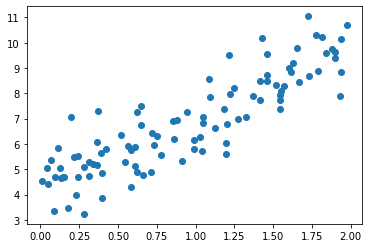

In [5]:
plt.scatter(X,y)

### Scikit-learn's Linear Regression

We can use sklearn's LinearRegression() to train a linear regressor on our training data X. By default, it uses Singular Value Decomposition (SVD) and normal equation method for finding out the best parameters of the model.

From the bias and coefficient values of the learned model, we can see that they are pretty close to what was expected.

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('Bias = ',lin_reg.intercept_, '\nSlope = ',lin_reg.coef_[0])

Compute the predicted values of given data using the learned model.

*Note*: It is always recommended to split the input data into training and test sets, so that the model is trained on the training set and evaluated on the test set. However, here our goal is to simply understand how linear regression works and how gradient descent is used to learn the parameters, splitting of the data has been skipped.

In [36]:
predictions = lin_reg.predict(X)

Plot the regression line over the input data.

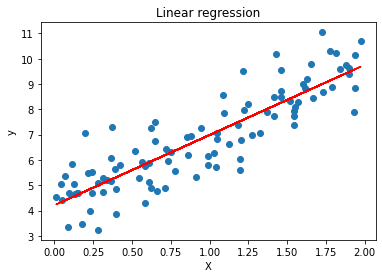

In [37]:
plt.scatter(X, y)
plt.plot(X, predictions, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear regression')
plt.show()

 
### Cost Function
There might be multiple lines that can fit the training data. How to choose the best fit? This is where optimization of cost function comes into play. A line is said to best fit the given training data if it optimizes (minimizes) the cost function for that training data. 

Before moving on to gradient descent, it is important to know about the cost function used by linear regression i.e. MSE (Mean Squared Error). It is computed as the sum of squared differences between the actual target values and the predicted values averaged over all training examples.

Cost function as a function of parameters $\theta = [\theta_0, \theta_1,..., \theta_n]^T$ can be formulated as:

<center> $J(\theta) = \frac{1}{m}\Sigma_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})^2$ </center>

where
- $h_\theta(x^{(i)})$ is the predicted target value
- $y^{(i)}$ is the actual target value



### Visualizing the cost function

We can visualize the cost function on a 3D surface for different pairs of $\theta_0$ and $\theta_1$ as follows:

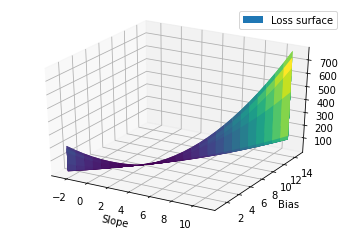

In [38]:
# we have taken the ranges closer to the expected solution
slope = np.arange(-2.5,11.5,0.5)  
bias = np.arange(1, 15, 0.5)  
# w0, w1 = np.meshgrid(slope, bias)

w0 = np.tile(slope, (100,1)) # here 100 is the number of examples in X
w1 = np.tile(bias, (100,1))

# compute predicted values
predictions = w0*X + w1  

# compute loss as squared errors
loss = np.power((y-predictions),2) 

fig = plt.figure()  
ax = fig.gca(projection='3d')  
surf = ax.plot_surface(w0,  
  w1,  
  loss,  
  label="Loss surface",  
  cmap='viridis', edgecolor='none')  
surf._facecolors2d=surf._facecolors3d  
surf._edgecolors2d=surf._edgecolors3d  
ax.set_xlabel('Slope')  
ax.set_ylabel('Bias')  
ax.legend()


### Gradient Descent

The general idea of gradient descent is to tweak the parameters iteratively in order to minimize a cost function. 

- To implement Gradient Descent, take the gradient (partial derivative) of the cost function w.r.t. each model parameter $\theta_j$. 
- In other words, we need to calculate how much the cost function will change if $\theta_j$ is changed a little bit.
- Then, update the parameters so as to go in opposite direction of the gradients to move towards minimum of the cost function.

**Note:** Gradient is the direction of steepest ascent. That's why for minimization tasks, we calculate the gradient and perform subtraction during updation of parameters. 

**Cost function of linear regression:**
In our example, we have just one input feature $x_1$. Let's introduce another feature $x_0=1$ for all the training examples just to make the calculations convenient. So, linear regression model can be formulated as follows:

<center> $ h_\theta(x^{(i)}) = \theta_0x_0^{(i)}+\theta_1x_1^{(i)}$ </center>

Linear regression uses mean squared error as the loss function which is given as follows over $m$ examples:

<center>$ J(\theta) = \frac{1}{m}\Sigma_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})^2 $</center>

At every iteration, compute the gradient of $ J(\theta) $ w.r.t all the parameters.

<center>$ \Delta_j(J(\theta)) = \frac{2}{m}\Sigma_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j$</center>

The above steps can be performed in one go using numpy using vectorized notation as follows:

<center> $ h_\theta(X) = X\theta$</center>

**Note:** If we are taking $\theta$ as a column vector, then it goes as $\theta^{T}X$

Gradient vector is computed as follows:

<center> $\Delta(\theta) = \frac{2}{m} X^{T}(X\theta  -  y) $ </center>

Update the parameters as follows:
<center> $\theta := \theta - \alpha\Delta(\theta) $</center>


Here $\alpha$ is the learning rate that controls the step size to update the parameter values. 

**Learning Rate**
<br>
The learning rate $\alpha$ is used to decide on the step size while updating the parameter values. A low value of $\alpha$ may result in very slow convergence towards the minima, whereas a high value of $\alpha$ might lead to overshooting the minima, sometimes also leading to divergence. 

**Note:** One interesting thing to note about linear regression is that its loss function is convex function and there is just one global minimum, and we don't need to worry about being stuck at a local minima (that may be a matter of concern in other algorithms such as neural networks).

**Types of gradient descent**
<br>
Depending on how much of the training data is considered while gradient calculation during each iteration, there can be three possibilities to implement gradient descent algorithm.
- Batch Gradient Descent: Entire training set is used at each iteration to compute the loss function and update parameters using gradients.
- Stochastic Gradient Descent: One random example is chosen at each iteration to compute the loss function and update the parameters using gradients.
- Mini-batch Gradient Descent: A random mini-batch smaller than the entire training set but larger than a single instance, is used at each iteration to compute the loss function and update parameters using gradients.

### Batch gradient descent
``` 
  for i in range(num_iterations): 
      for example in range(num_examples): # we have to go through whole dataset every iteration
          gradients = 2/num_examples * X_b.T.dot(X_b.dot(theta) - y) # compute gradients for all examples
          theta = theta - alpha * gradients # updation rule

```

$ num\_iterations $ depends on when our algorithm is likely to converge, we can stop early by keeping a check on the gradient.

Now let's see batch gradient descent in action for our hypothetical data.

In [39]:
alpha = 0.1 # this value of learning rate often works
num_iterations = 50
num_examples = 100


'''np.c_ is used to concatenate, initially our input is one-dimensional array,just one variable (or feature as we can say)
but now we can add another column (feature) consisting of all ones, so that when we do the dot product, it gets multiplied with the bias term'''
X_b = np.c_[np.ones((100,1)), X] # add x0=1 to each instance

print(X_b.shape)

(100, 2)


Randomly initialize the parameters $\theta$ (theta).
<br>
**How many parameters do we need to initialize?** Number of features in training data + 1 (bias)

In our example, we need two parameters.

In [40]:
theta = np.random.randn(2,1) # start with random values of parameters, here we need two parameters
print(theta)

[[0.01300189]
 [1.45353408]]


In [41]:
theta.shape

(2, 1)

The vectorized implementation of batch gradient descent is done below.

In [42]:
def plot_data(X, y, theta):
    predictions = X.dot(theta)
    X_without_x0 = X[:,1]
    plt.plot(X_without_x0, predictions, color = 'red')


    # the code below follows the same algorithm given above, 
    # but just implemented in vectorized form
    def batchGD(X_b, y, theta, num_examples, num_iterations, alpha):
        plt.figure()
        past_costs = []
        past_thetas = [theta] # originally our initial values
        past_slopes = []
        past_biases = []
        plt.scatter(X,y, marker='o') # makes the base plot
        for iteration in range(num_iterations):
            gradients = 2/num_examples * X_b.T.dot(X_b.dot(theta) - y) 
            prediction = np.dot(X_b, theta)
            error = prediction - y
            cost = 1/(2*num_examples) * np.dot(error.T,error) #np.dot(error.T,error) to calculate sqaured errors
            past_costs.append(cost)
            theta = theta - alpha * gradients # update parameters
            past_thetas.append(theta)
            past_slopes.append(theta[1])
            past_biases.append(theta[0])
            plot_data(X_b, y, theta)
            plt.title(f'Linear Regression with batch gradient descent with alpha = {alpha}')
        return past_thetas, past_costs, past_slopes, past_biases
    # plt.show()

<class 'numpy.ndarray'>
(100,)


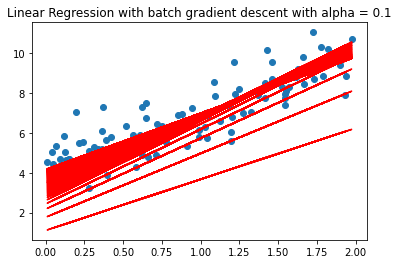

In [43]:
past_thetas, past_costs, past_slopes, past_biases = batchGD(X_b,y,theta,100,100,0.1)
flatten = np.concatenate(past_costs)
past_costs = flatten.ravel()
print(type(past_costs))
print(past_costs.shape)
past_costs = list(past_costs)

This is almost similar to what was given by the inbuilt LinearRegression of Scikit-learn.

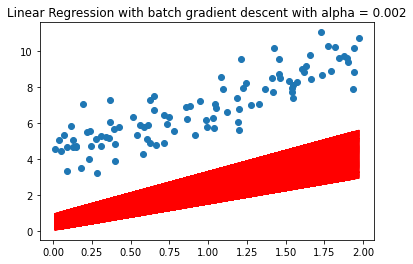

In [44]:
# try a smaller value of learning rate

batchGD(X_b,y,theta,100,50,0.002);

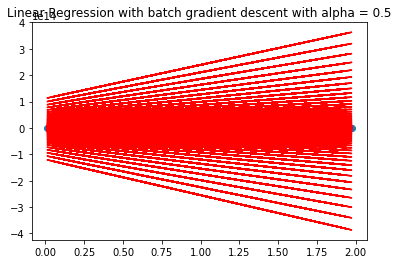

In [45]:
# try a larger value of learning rate

batchGD(X_b,y,theta,100,500,0.5);

<class 'numpy.float64'>


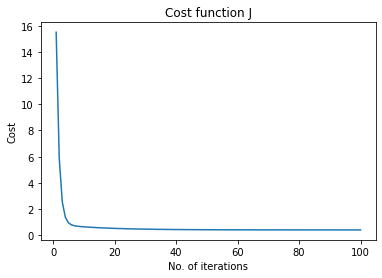

In [46]:
import matplotlib.animation as animation
print(type(past_costs[1]))
# plot the cost function
plt.title("Cost function J")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.plot((range(1,101)),past_costs)
plt.show()

From the above plot, we can see that initially the cost function is high but it starts decreasing with every iteration.

### Visualizing the Gradient Descent in action

Refer to https://matplotlib.org/stable/api/animation_api.html for animation using matplotlib.

In [2]:
from matplotlib.animation import FuncAnimation, PillowWriter
import networkx as nx
# Animation
fig,ax = plt.subplots()
# ax = plt.axes()
plt.scatter(X,y)
line, = ax.plot([],[],lw=2, color='red')
annotation = ax.text(-1,100,'')
# annotation.set_animated(False)

# Generate the animation data
def init():
    line.set_data([],[])
    annotation.set_text('')
    return line,annotation

    # animation function, called sequentially
    def animate(i):
        x = X_b[:,1:]
        y = past_thetas[i][1]*x + past_thetas[i][0]
        line.set_data(x,y)
        annotation.set_text(str(i))
    return line,annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=100,interval=100,blit=True)
from IPython.display import HTML
# HTML(anim.to_html5_video())
anim.save('anim')
HTML(anim.to_jshtml())


/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


NameError: name 'plt' is not defined

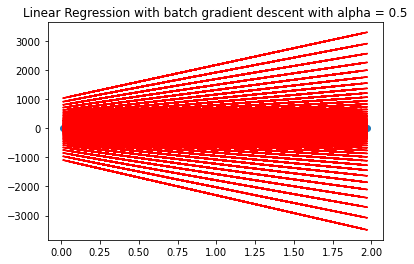

In [ ]:
past_thetas, past_costs, past_slopes, past_biases = batchGD(X_b,y,theta,100,100,0.5)

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=100,interval=200,blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

**Problem with batch gradient descent**

Batch gradient descent uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.
### Stochastic Gradient Descent (SGD)
SGD picks a random example from training set at every step and computes the gradients only on that single instance. It is therefore much faster than batch gradient descent, however less regular. The cost function bounces up and down decreasing only on average. Stochastic gradient descent gets $ \theta $ close to the minimum much faster than batch gradient descent, but never guarantees to find the optimal solution.

**Defining a learning schedule in stochastic gradient descent**

The idea is to gradually decrease the learning rate $ \alpha $ over time. Start with large value to make a quick progress towards minima (global or local), then make it smaller and smaller. If the learning rate is reduced too quickly, we may get stuck in a local minimum, and if it is reduced too slowly, we may jump around the minimum for a long time and end up with a suboptimal solution if we halt training too early.

``` 
  for epoch in range(num_epochs): 
      for example in range(num_examples): 
          random_index = np.random.randint(num_examples-1) # to choose a random sample
          xi = X_b[random_index:random_index+1]
          yi = y[random_index:random_index+1]
          gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # compute gradients just for one example
          theta = theta - alpha * gradients
          

```

**epochs vs iterations?**
- Iterate by rounds of *m* iterations
- Each round is called an epoch

In [48]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

In [49]:
def learning_schedule(t):
  return t0 / (t + t1)

In [50]:
theta = np.random.randn(2,1) # initialize random parameters

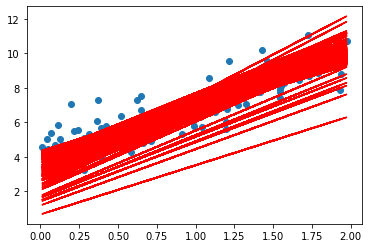

In [51]:
plt.scatter(X,y)
for epoch in range(n_epochs):
  for i in range(num_examples):
    random_index = np.random.randint(num_examples)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    alpha = learning_schedule(epoch*num_examples+i)
    theta = theta - alpha * gradients
    if epoch<=20: #plot results for 20 epochs
      plot_data(X_b,y,theta)

In [52]:
theta

array([[4.18475289],
       [2.73036719]])

### Mini-Batch Gradient Descent

Mini-batch gradient descent computes the gradients on small random sets of instances known as mini-batches. Some of its advantages over stochastic gradient descent are:
- a performance boost from hardware optimization of matrix operations, especially when using GPUs.
- algorithm's progress space is less erratic, especially with fairly large mini-batches, allowing it to end up walking around a bit closer to the minimum than SGD.

### Summary
- Linear regression is a supervised learning algorithm that learns to predict a target value as the weighted sum of data features. The weights or coefficients are known as parameters of the learning algorithm.
- Gradient Descent is an iterative, optimization approach that can be used to compute the optimal set of parameters by minimizing the loss function (loss function in case of linear regression is MSE).
- Batch Gradient Descent uses the entire training data at every iteration to compute the gradients, hence making it slow for large datasets. However, it is guaranteed to converge at a local minimum.
- Stochastic Gradient Descent picks up a random instance at each iteration to compute the iteration, making it a lot faster than Batch Gradient Descent. However, once it reaches around the minimum, it will continue to bounce around, never settling down. So, techniques such as learning schedule need to be used. 
- Mini-batch Gradient Descent uses random subsets of training data at each iteration to compute gradients, and works slighly better than SGD. But suffers from same problems such as never settling at the local minimum.

